In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
# loading the data with sns 
data = sns.load_dataset("datasets/penguins")
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Exploring the Dataset

In [4]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
# checking for missing values
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
# let's drop the missing values
data.dropna(inplace=True)

In [8]:
# I will use the OneHotEncoder to encode the "species" and "island" columns
encoder = OneHotEncoder()
encoded = encoder.fit_transform(data[["species", "island"]]).toarray()
encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["species", "island"]))
data = pd.concat([data, encoded], axis=1)


# I am gonna drop the species and island columns
data.drop(columns=["species", "island"], inplace=True)
data.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,MALE,1.0,0.0,0.0,0.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,FEMALE,1.0,0.0,0.0,0.0,0.0,1.0
2,40.3,18.0,195.0,3250.0,FEMALE,1.0,0.0,0.0,0.0,0.0,1.0
4,36.7,19.3,193.0,3450.0,FEMALE,1.0,0.0,0.0,0.0,0.0,1.0
5,39.3,20.6,190.0,3650.0,MALE,1.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# Now I need to convert sex column into binary values
encoder_label = LabelEncoder()
data['sex'] = encoder_label.fit_transform(data['sex'])

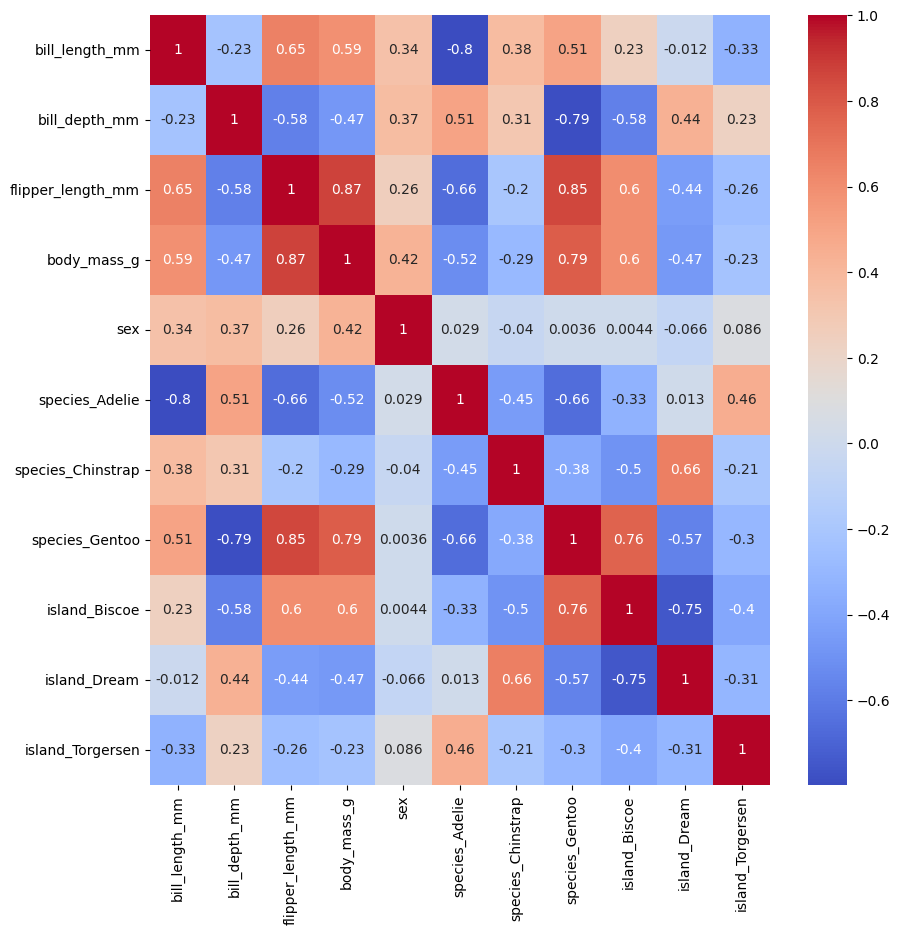

In [10]:
# I converted categorical values into numerical values, now I am gonna find the correlation between them
correlation = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
1. Flipper length and body mass have positive correlation, which means heavier penguins often have longer flippers.
2. bill_length_mm has a strong negative correlation with species_Adelie and a positive correlation with species_Gentoo which means Adelie penguins have shorter bills and Gentoo penguins have longer bills.
3. bill_depth_mm and species_Gentoo are negative correlation, bill_depth_mm is positive correlation with species_Adelie which means Adelie penguins have deeper bills than Gentoo penguins.
4. flipper_length_mm and species_Adelie have a strong negative correlation, flipper length correlates positive correlation with species_Gentoo which means Adelie penguins have the shortest flippers and Gentoo penguins have the longest flippers.
5. body_mass_g has a positive correlation with species_Gentoo and a negative correlation with species_Adelie which means Gentoo penguins are usually heavier and Adelie penguins are lighter than Gentoo.
6. island_Biscoe has strong positive correlation with species_Gentoo and strong negative correlation with island_Dream which means Most Gentoo penguins are more on Biscoe Island. 
7.island_Dream shows a positive correlation with species_Chinstrap which means Chinstrap penguins are more on Dream Island.
8. island_Torgersen has positivelywith species_Adelie which means Adelie penguins are more  on Torgersen Island
9. Sex has positive correlation with bill_length_mm, bill_depth_mm and body_mass_g.

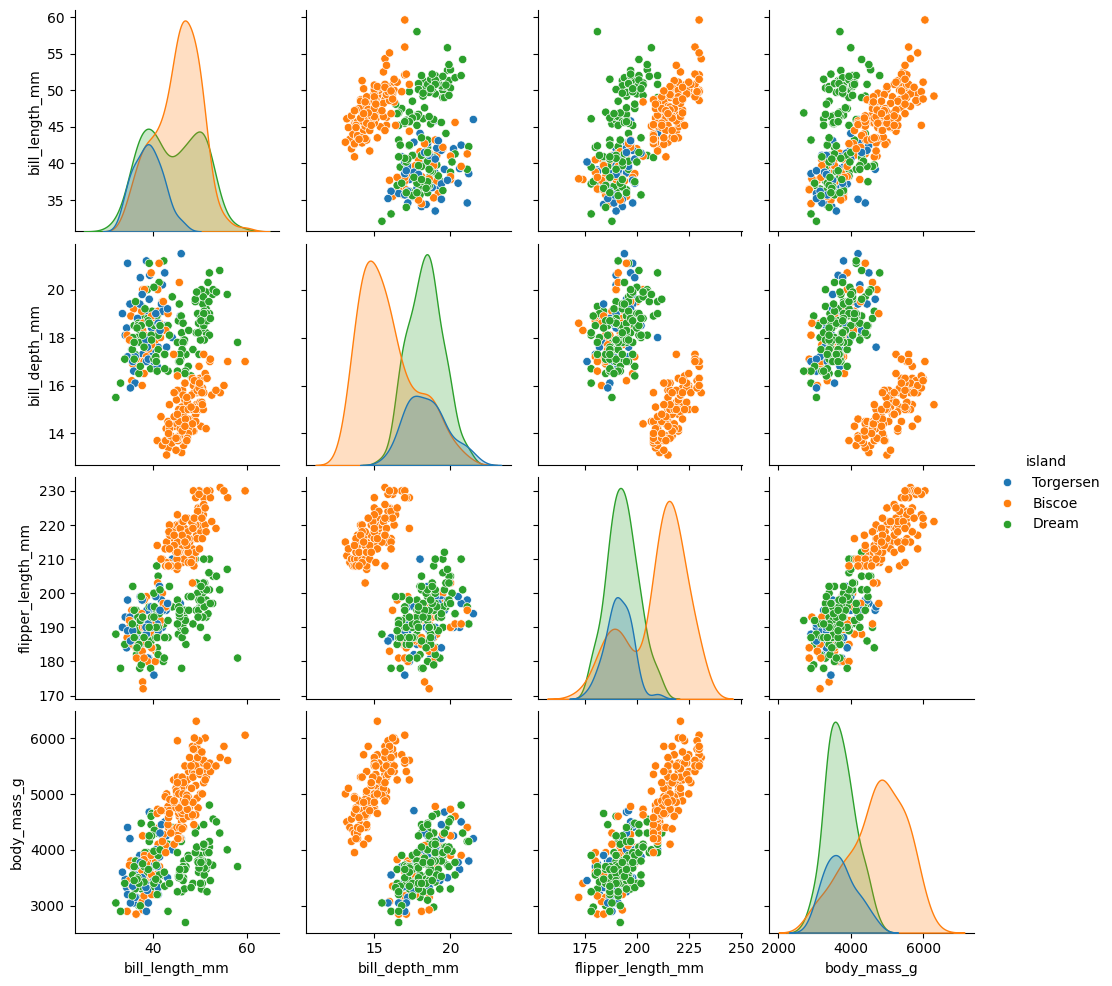

In [11]:
# I reload the original dataset, because it is not encoded and it is easier to understand.
df = sns.load_dataset("datasets/penguins")
sns.pairplot(data = df, hue='island') 

## <span style="color: #20C997;">Personal Analysis</span>
1-The bigger or heavier a penguin is, the longer its flippers and bills usually are.<br>
2-Penguins from different islands have unique characteristics:<br>
<li>Dream island penguins have longer bills
<li>Biscoe island penguins weigh more


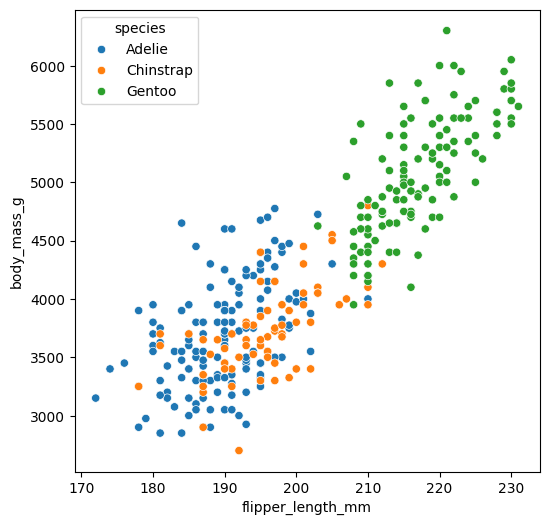

In [12]:
# Since Flipper Length and Body Mass have strong positive correlation, I want to compare them based on the species
# Since I split the species column into 3 columns, I need to reload the dataset

df = sns.load_dataset("datasets/penguins")
plt.figure(figsize=(6, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df, hue='species')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
Adelie has shorter flipper lengths and lighter body masses.
Chinstrap is heavier than Adelie
Gentoo is  clearly larger and heavier


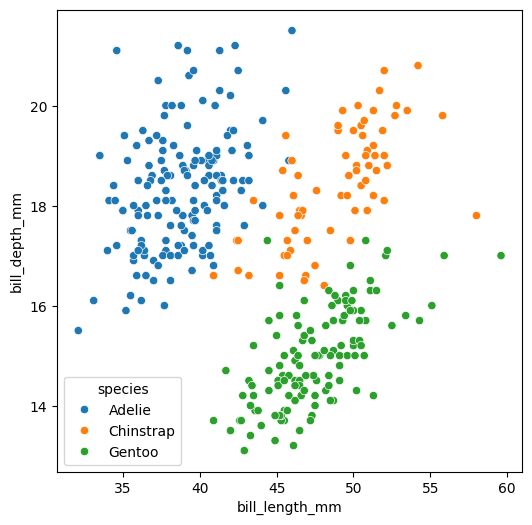

In [13]:
# Now I will compare the bill_length_mm vs. bill_depth_mm based on the species
plt.figure(figsize=(6, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=df, hue='species')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
1. Adelie  has shorter bill lengths  and deeper bill depths
2. Chinstrap has medium bill lengths and bill depths
2. Gentoo has longest bill lengths and shallowest bill depths.


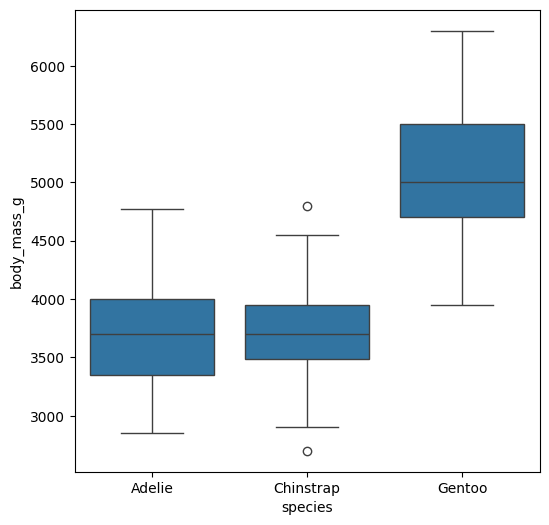

In [14]:
# Now I will compare species based on body_mass_g
plt.figure(figsize=(6, 6))
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
<li>Adelie and Chinstrap penguins are smaller and have similar body weights.
<li>Gentoo penguins are much larger and heavier than the other two species.

In [19]:
# Finding the amount of each group of penguins for each species using groupby
grouped_data = df.groupby(['species', 'island']).size().reset_index(name='count').sort_values(by='count', ascending=False)
grouped_data

,species,island,count
4,Gentoo,Biscoe,124
3,Chinstrap,Dream,68
1,Adelie,Dream,56
2,Adelie,Torgersen,52
0,Adelie,Biscoe,44


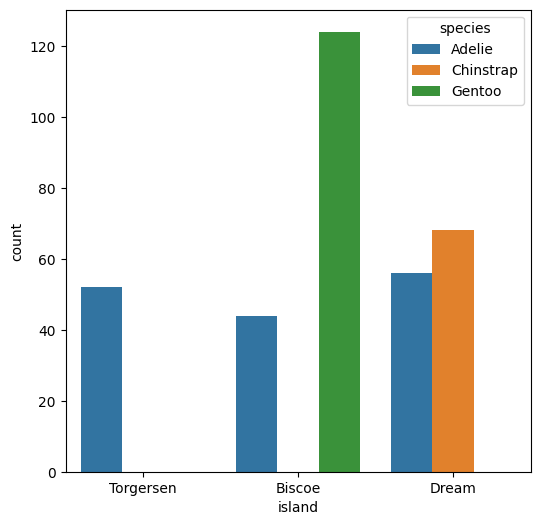

In [15]:
# Visualizing the distribution of species across the islands
plt.figure(figsize=(6, 6))
sns.countplot(x='island', data=df, hue='species')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
<li>Adelie penguins live everywhere.
<li>Chinstrap penguins live only on Dream island.
<li>Gentoo penguins live only on Biscoe island and are the most common species.

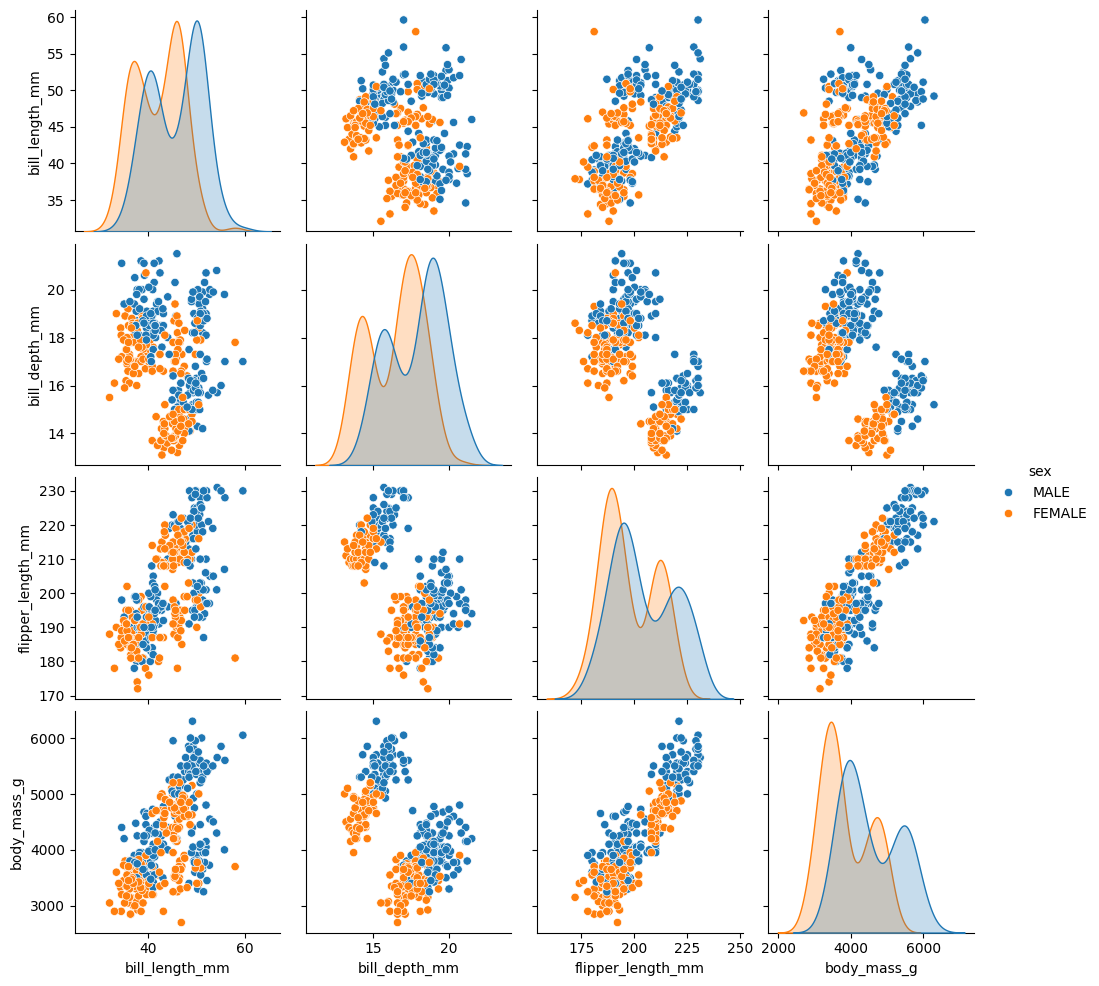

In [20]:
sns.pairplot(data = df, hue='sex')

## <span style="color: #20C997;">Personal Analysis</span>
<li>Males are generally bigger and heavier than females.
<li>Males have longer flippers and higher body mass, but there is some overlap in bill size.

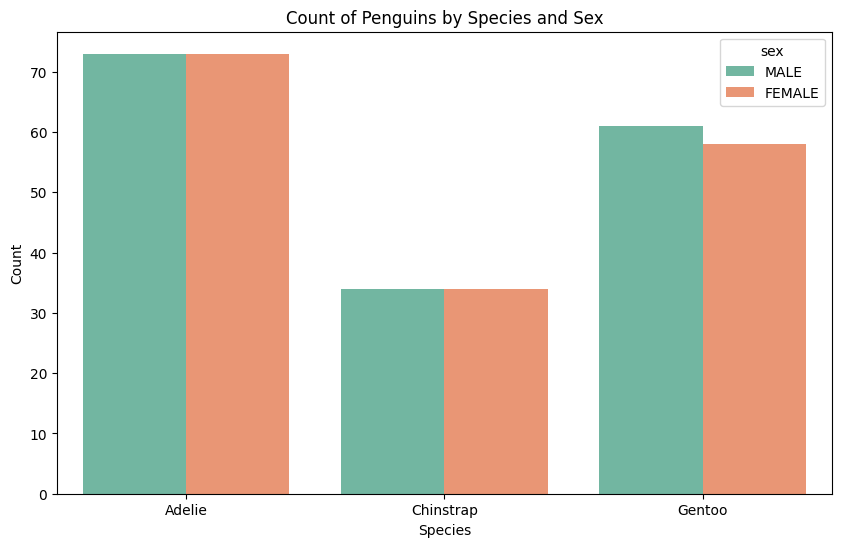

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='species', hue='sex', data=df, palette='Set2')
plt.title('Count of Penguins by Species and Sex')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
<li>Adelie penguins have a balanced number of males and females.
<li>Gentoo penguins have more males than females, but the difference is not a lot.